In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("yerevan_walk_and_car.csv")

In [ ]:
df["lat_rad"] = np.radians(df["lat"])
df["lon_rad"] = np.radians(df["lon"])


In [ ]:
def distance(lat1, lon1, alt1,  lat2, lon2, alt2):
  r_earth = 6371
  return np.sqrt(np.square(2* r_earth * np.arcsin(np.sqrt(np.square(np.sin((lat2 - lat1)/2)) + np.cos(lat1) * np.cos(lat2) * np.square(np.sin((lon2 - lon1)/2))))) + np.square((alt2 - alt1)/1000))


In [ ]:
df["speed_count"] = np.nan

for i in range(0, (len(df)-1)):
  df.iloc[i+1, 9] = distance(df.iloc[i, 7], df.iloc[i, 8], df.iloc[i, 3], df.iloc[i+1, 7], df.iloc[i+1, 8], df.iloc[i+1, 3]) * 3600

In [ ]:
df["acceleration"] = np.nan
df["acceleration"] = df["speed_count"].diff() * 36000
df.iloc[1, 10] = df.iloc[1, 9] * 3600

In [ ]:
df.insert(9, 'sferic_dis', np.nan)

In [ ]:
for i in range(0, (len(df)-1)):
  df.loc[i+1, "sferic_dis"] = distance(df.iloc[i, 7], df.iloc[i, 8], df.iloc[i, 3], df.iloc[i+1, 7], df.iloc[i+1, 8], df.iloc[i+1, 3])

In [ ]:
def eucledian_distance(lat1, lon1, alt1, lat2, lon2, alt2):
  r_earth = 6371
  return np.sqrt(np.square((r_earth + alt2) * np.cos(lat2) * np.cos(lon2) - (r_earth + alt1) * np.cos(lat1) * np.cos(lon2)) + np.square((r_earth + alt2) * np.cos(lat2) * np.sin(lon2) - (r_earth + alt1) * np.cos(lat1) * np.sin(lon1)) + np.square((r_earth + alt2) * np.sin(lat2) - (r_earth + alt1) * np.sin(lat1)))

In [ ]:
df["evclid_dis"] = np.nan

for i in range(0, (len(df)-1)):
  df.loc[i+1, "evclid_dis"] = eucledian_distance(df.iloc[i, 7], df.iloc[i, 8], df.iloc[i, 3], df.iloc[i+1, 7], df.iloc[i+1, 8], df.iloc[i+1, 3]) / 1000

In [ ]:
df

,timestamp,lat,lon,altitude_m,speed_m_s,bearing_deg,mode,lat_rad,lon_rad,sferic_dis,speed_count,acceleration,evclid_dis
0,2025-11-11T12:00:00+04:00,40.177194,44.512552,986.163994,1.637643,232.558360,walk,0.701224,0.776891,NaN,NaN,NaN,NaN
1,2025-11-11T12:00:01+04:00,40.177196,44.512562,988.988296,1.668377,229.744739,walk,0.701224,0.776891,0.002953,10.629688,3.826688e+04,0.002825
2,2025-11-11T12:00:02+04:00,40.177209,44.512502,987.547169,1.537325,226.949146,walk,0.701225,0.776890,0.005445,19.600891,3.229633e+05,0.001443
3,2025-11-11T12:00:03+04:00,40.177162,44.512590,992.121049,1.942699,225.351651,walk,0.701224,0.776891,0.010203,36.729676,6.166363e+05,0.004577
4,2025-11-11T12:00:04+04:00,40.177162,44.512478,987.349326,1.331484,228.826594,walk,0.701224,0.776889,0.010662,38.382946,5.951774e+04,0.004776
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,2025-11-11T13:39:53+04:00,40.156959,44.502183,993.683951,9.657329,341.262277,car,0.700871,0.776710,0.019455,70.039366,1.764642e+06,0.006925
9978,2025-11-11T13:39:54+04:00,40.157050,44.502223,992.584912,8.778171,340.623046,car,0.700873,0.776710,0.010732,38.635354,-1.130544e+06,0.001098
9979,2025-11-11T13:39:55+04:00,40.157114,44.502230,988.921290,11.249007,30.017897,car,0.700874,0.776710,0.008027,28.897854,-3.505500e+05,0.003663
9980,2025-11-11T13:39:56+04:00,40.157198,44.502331,992.600892,11.069447,30.528715,car,0.700875,0.776712,0.013211,47.557997,6.717651e+05,0.003683


In [ ]:
ten_minute_speed = np.zeros(16)
for i in range(len(df)//600):
  ten_minute_speed[i] = (df.iloc[(i * 600) + i : ((i+1) * 600) + i, 10].mean())

ten_minute_speed

array([21.94481221, 20.96688442, 21.64690036, 20.99785936, 20.59555962,
       21.15194162, 41.26959932, 33.55449291, 32.74777701, 33.3887192 ,
       34.09205769, 31.786978  , 32.58282617, 29.8985471 , 34.91243622,
       31.78060414])

In [ ]:
ten_minute_acceleration = np.zeros(16)
for i in range(len(df)//600):
  ten_minute_acceleration[i] = (df.iloc[(i * 600) + i : ((i+1) * 600) + i, 11].mean())

ten_minute_acceleration

array([  765.03957181,   827.30251953,  -760.04522129,  -972.62872135,
       -1574.44980529,   986.12640867,   414.1849909 ,  -615.5661027 ,
        1185.7816724 ,  -683.8235873 ,  1905.53928231,     9.241524  ,
        -594.00345285,  -513.03630892,  -449.49865696,   412.49685227])

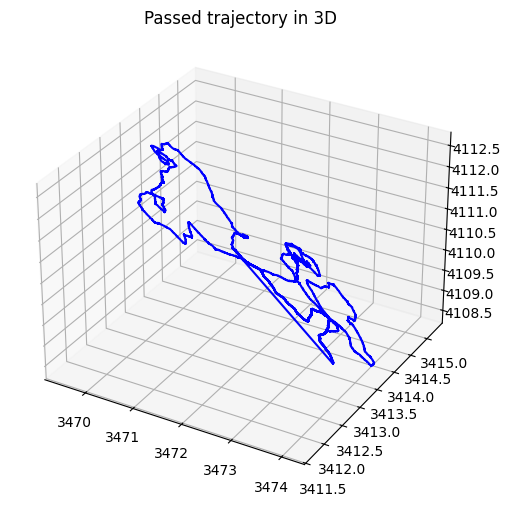

In [ ]:
r_earth = 6371
x_draf = (r_earth + df["altitude_m"]/1000) * np.cos(df["lat_rad"]) * np.cos(df["lon_rad"])
y_draf = (r_earth + df["altitude_m"]/1000) * np.cos(df["lat_rad"]) * np.sin(df["lon_rad"])
z_graf = (r_earth + df["altitude_m"]/1000) * np.sin(df["lat_rad"])


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_draf  , y_draf ,z_graf, "blue" )
plt.title("Passed trajectory in 3D")
plt.show()


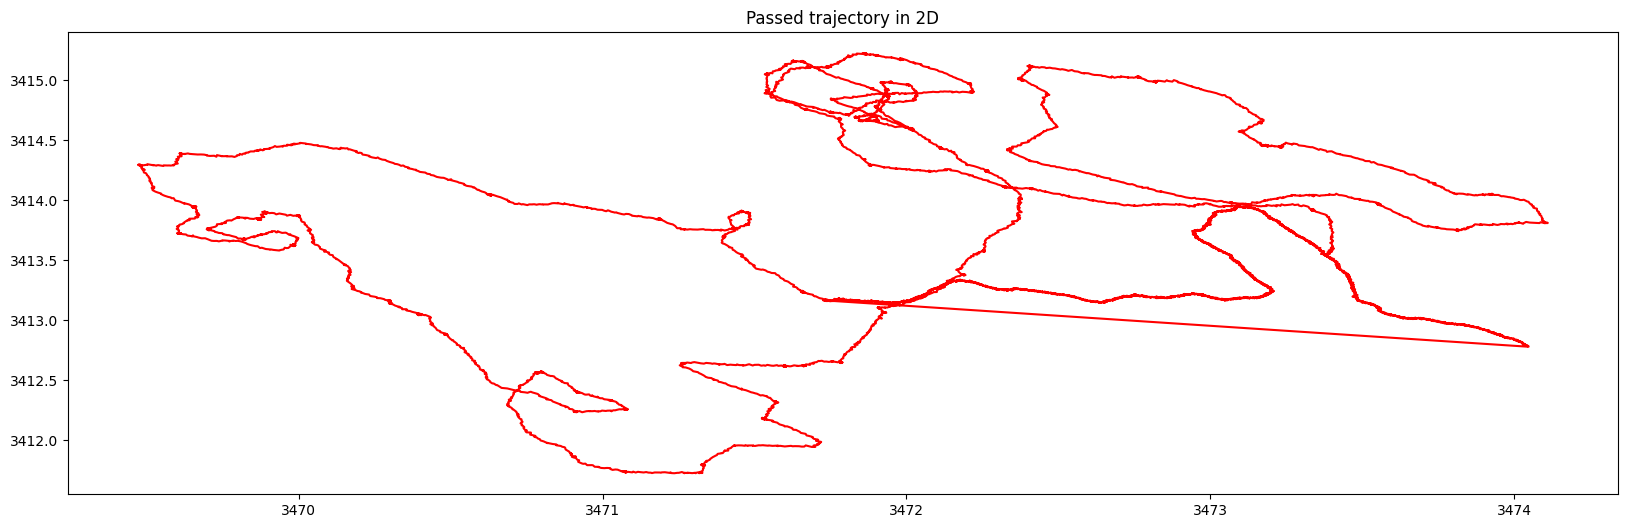

In [ ]:
fig_1 = plt.figure(figsize=(20, 6))
ax_1 = fig_1.add_subplot(111)
ax_1.plot(x_draf  , y_draf, "red")
plt.title("Passed trajectory in 2D")
plt.show()

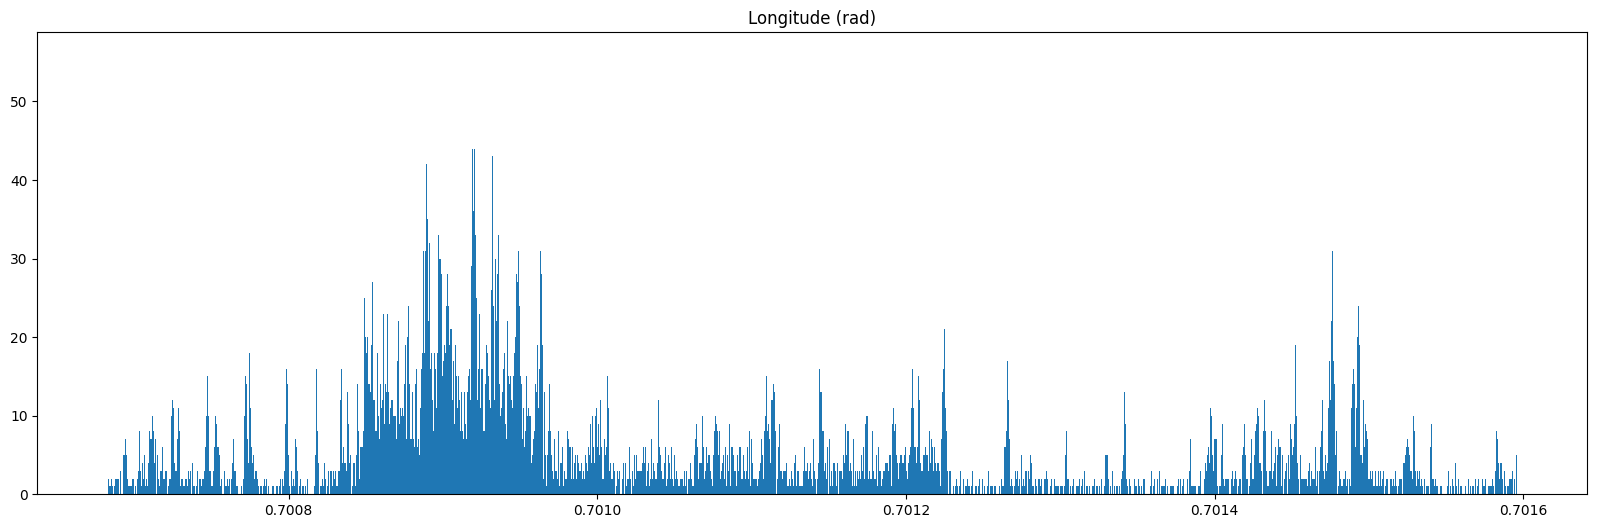

In [ ]:
plt.figure(figsize=(20, 6))

plt.title("Longitude (rad)")

plt.hist(df["lat_rad"], bins = 2000);

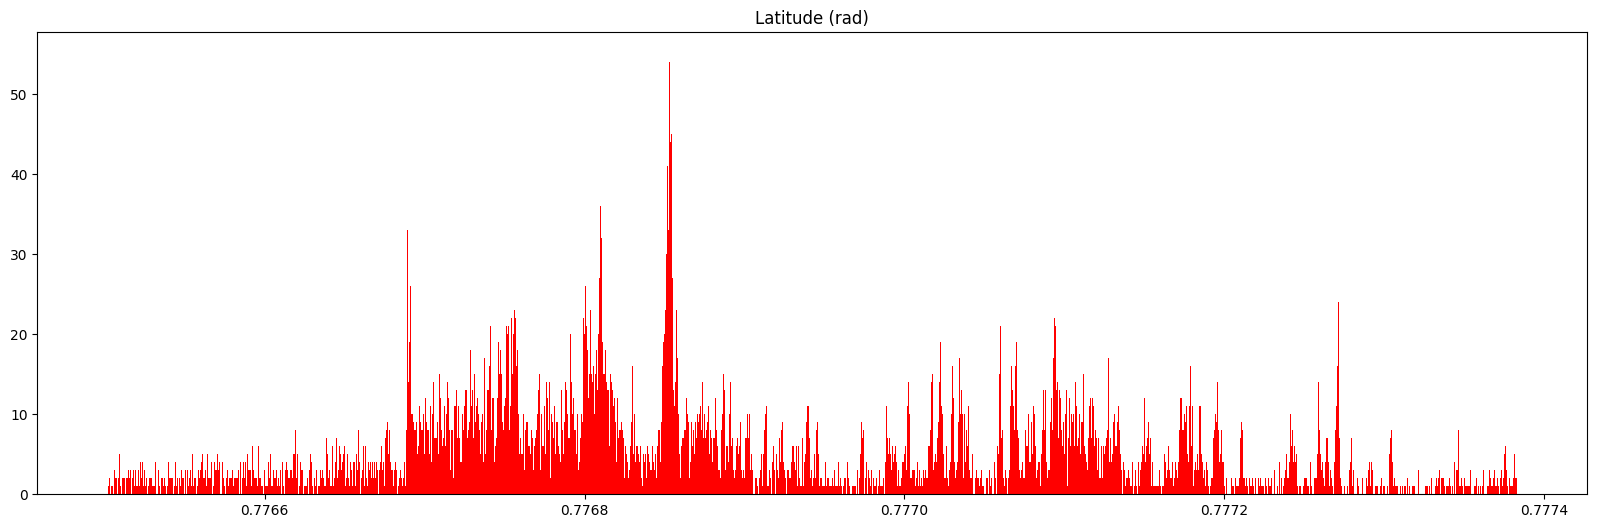

In [ ]:
plt.figure(figsize=(20, 6))

plt.title("Latitude (rad)")
plt.hist(df["lon_rad"], bins=2000, color = "r");

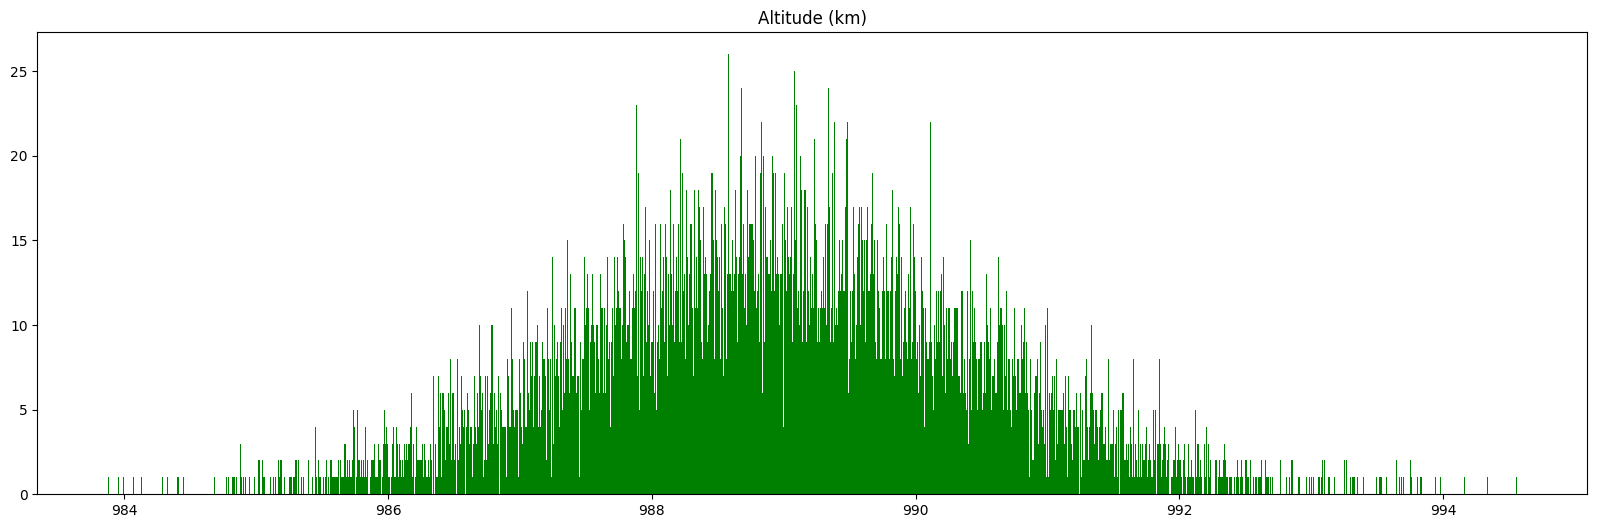

In [ ]:
plt.figure(figsize=(20, 6))

plt.title("Altitude (km)")
plt.hist(df["altitude_m"], bins=2000, color = "green");

In [ ]:
alt_change = np.zeros(16)
for i in range(len(df)//600):
  alt_change[i] = df.iloc[(i * 600) + i : ((i+1) * 600) + i, 3].mean()

np.diff(alt_change)

array([-0.07534849,  0.1443131 , -0.10802926, -0.00998541,  0.1093666 ,
       -0.02642373, -0.10037357,  0.01580626,  0.06806562, -0.0456307 ,
        0.06169275, -0.05525697, -0.0099465 , -0.03002954,  0.05340472])